In [23]:
#import libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import requests

In [24]:
url = 'https://www.michaelkors.com/sale/men/_/N-28au'
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/192.168.56.1 Safari/537.36 QIHU 360SE'
}

In [25]:
#scrape web
result = requests.get(url, headers=headers)
result

<Response [200]>

In [26]:
doc = BeautifulSoup(result.text, 'html.parser')

In [27]:
products = doc.find_all('div',{'class':'product-tile'})

<div class="product-tile left large-6 small-6" data-product-id="37S1LCOY1L"><div class="product-tile-container"><div class="image-panel"><a href="/cooper-pebbled-leather-sling-pack/_/R-US_37S1LCOY1L?color=0001"><div class="product-image-container"><div><div class="LazyLoad"><img alt="Cooper Pebbled Leather Sling Pack" class="product-image" data-altsrc="//michaelkors.scene7.com/is/image/MichaelKors/37S1LCOY1L-0001_2?$ProductMain$&amp;fmt=pjpeg" data-src="//michaelkors.scene7.com/is/image/MichaelKors/37S1LCOY1L-0001_IS?$ProductMain$&amp;fmt=pjpeg" src=""/></div></div></div></a></div></div><ul class="description-panel text-left"><li class="product-brand-container"><a aria-label="" href="/cooper-pebbled-leather-sling-pack/_/R-US_37S1LCOY1L" role="">michael kors mens</a></li><li class="product-name-container"><a aria-label="" href="/cooper-pebbled-leather-sling-pack/_/R-US_37S1LCOY1L" role="">Cooper Pebbled Leather Sling Pack</a></li><li class="product-price-container wasAndNowPriceproduct"
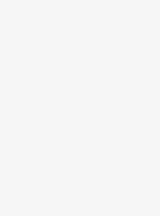

In [28]:
products[0]

In [29]:
# <a aria-label="" href="/cooper-pebbled-leather-sling-pack/_/R-US_37S1LCOY1L" role="">Cooper Pebbled Leather Sling Pack</a>

<a href="/cooper-pebbled-leather-sling-pack/_/R-US_37S1LCOY1L?color=0001"><div class="product-image-container"><div><div class="LazyLoad"><img alt="Cooper Pebbled Leather Sling Pack" class="product-image" data-altsrc="//michaelkors.scene7.com/is/image/MichaelKors/37S1LCOY1L-0001_2?$ProductMain$&amp;fmt=pjpeg" data-src="//michaelkors.scene7.com/is/image/MichaelKors/37S1LCOY1L-0001_IS?$ProductMain$&amp;fmt=pjpeg" src=""/></div></div></div></a>
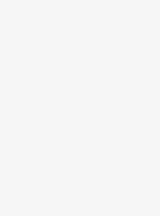

In [30]:
products[0].find('a')

In [31]:
#get name
products[0].find('li', {'class','product-name-container'}).text.strip()

'Cooper Pebbled Leather Sling Pack'

In [32]:
#get old price
oprice = products[0].find('div',{'class','listPrice'}).text.strip().split('$')
oprice[len(oprice)-1]

'368.00'

In [33]:
#get new price
nprice = products[0].find('div',{'class','salePrice'}).text.strip().split('$')
nprice[len(nprice)-1]

'119.00'

In [34]:
#initialize the dataframe
df = pd.DataFrame(columns=['Product number', 'Product Name', 'New Price', 'Old Price'])
i=0
for prod in products:
    i=i+1
    productName = prod.find('li', {'class','product-name-container'}).text.strip()
    
    nprice = prod.find('div',{'class','salePrice'}).text.strip().split('$')
    newPrice = f'${nprice[len(nprice)-1]}'
    
    oprice = prod.find('div',{'class','listPrice'}).text.strip().split('$')
    oldPrice = f'${oprice[len(oprice)-1]}'
    
    #create row data 
    row = pd.DataFrame([[i,productName,newPrice,oldPrice]],columns=['Product number', 'Product Name', 'New Price', 'Old Price'] )
    
    #concat dataframe
    df = pd.concat([df,row], ignore_index=True)


In [35]:
df

,Product number,Product Name,New Price,Old Price
0,1,Cooper Pebbled Leather Sling Pack,$119.00,$368.00
1,2,Hudson Logo Sling Pack,$179.00,$368.00
2,3,Hudson Logo and Leather Backpack,$349.00,$598.00
3,4,Cooper Logo Messenger Bag,$179.00,$498.00
4,5,Cooper Logo Sling Pack,$119.00,$368.00
...,...,...,...,...
61,62,Hudson Leather Bi-Fold Card Case,$39.00,$98.00
62,63,Embossed Leather Billfold Wallet With Passcase,$49.00,$248.00
63,64,Athens Quilted Nylon Puffer Vest,$59.00,$148.00
64,65,Embossed Leather Billfold Wallet With Passcase,$49.00,$248.00


In [36]:
df.to_excel('michaelkors_products.xlsx', index=False)